In [1]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten , Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


Using TensorFlow backend.


In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,                                   
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    'Images/Split/train',
    target_size=(128, 128),
    batch_size=10,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(
    'Images/Split/test',
    target_size=(128, 128),
    batch_size=10,
    class_mode='binary')

val_set = test_datagen.flow_from_directory(
    'Images/Split/val',
    target_size=(128, 128),
    batch_size=10,
    class_mode='binary')

Found 20060 images belonging to 2 classes.
Found 2510 images belonging to 2 classes.
Found 2507 images belonging to 2 classes.


In [3]:
# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(64, (3, 3), input_shape = (128, 128, 3), activation = 'relu', padding = 'same'))
classifier.add(Dropout(0.2))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the Model
classifier.add(Flatten())

# Connecting all layer
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the model
classifier.compile(optimizer = 'sgd',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

In [4]:
class1 = classifier.fit(
    training_set,
    epochs=100,
    validation_data=val_set)

Epoch 1/100
2006/2006 [==============================] - 65s 32ms/step - loss: 0.4972 - accuracy: 0.7772 - val_loss: 0.4445 - val_accuracy: 0.6729
Epoch 2/100
2006/2006 [==============================] - 65s 33ms/step - loss: 0.4518 - accuracy: 0.8075 - val_loss: 0.2991 - val_accuracy: 0.8253
Epoch 3/100
2006/2006 [==============================] - 64s 32ms/step - loss: 0.4337 - accuracy: 0.8151 - val_loss: 0.2745 - val_accuracy: 0.8337
Epoch 4/100
2006/2006 [==============================] - 64s 32ms/step - loss: 0.4162 - accuracy: 0.8235 - val_loss: 0.3825 - val_accuracy: 0.8428
Epoch 5/100
2006/2006 [==============================] - 66s 33ms/step - loss: 0.4080 - accuracy: 0.8266 - val_loss: 0.7349 - val_accuracy: 0.8416
Epoch 6/100
2006/2006 [==============================] - 66s 33ms/step - loss: 0.3995 - accuracy: 0.8312 - val_loss: 0.1939 - val_accuracy: 0.8452
Epoch 7/100
2006/2006 [==============================] - 65s 32ms/step - loss: 0.3925 - accuracy: 0.8314 - val_loss: 0

2006/2006 [==============================] - 64s 32ms/step - loss: 0.2781 - accuracy: 0.8895 - val_loss: 0.1370 - val_accuracy: 0.9059
Epoch 57/100
2006/2006 [==============================] - 63s 32ms/step - loss: 0.2783 - accuracy: 0.8895 - val_loss: 0.0835 - val_accuracy: 0.8899
Epoch 58/100
2006/2006 [==============================] - 65s 32ms/step - loss: 0.2753 - accuracy: 0.8898 - val_loss: 0.3020 - val_accuracy: 0.9055
Epoch 59/100
2006/2006 [==============================] - 64s 32ms/step - loss: 0.2739 - accuracy: 0.8908 - val_loss: 0.3152 - val_accuracy: 0.8975
Epoch 60/100
2006/2006 [==============================] - 63s 32ms/step - loss: 0.2752 - accuracy: 0.8908 - val_loss: 0.2777 - val_accuracy: 0.8991
Epoch 61/100
2006/2006 [==============================] - 64s 32ms/step - loss: 0.2784 - accuracy: 0.8899 - val_loss: 0.1474 - val_accuracy: 0.8979
Epoch 62/100
2006/2006 [==============================] - 65s 32ms/step - loss: 0.2760 - accuracy: 0.8905 - val_loss: 0.4238 

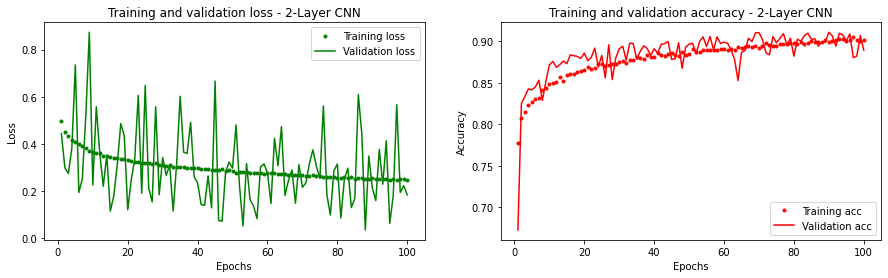

In [5]:
#Extracting CNN Results for Visualization
hist_cnn = class1.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['accuracy'] 
val_acc_values = hist_cnn['val_accuracy']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss - 2-Layer CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy - 2-Layer CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('Images/Model/cnn1.png')
plt.show()